../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2
../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


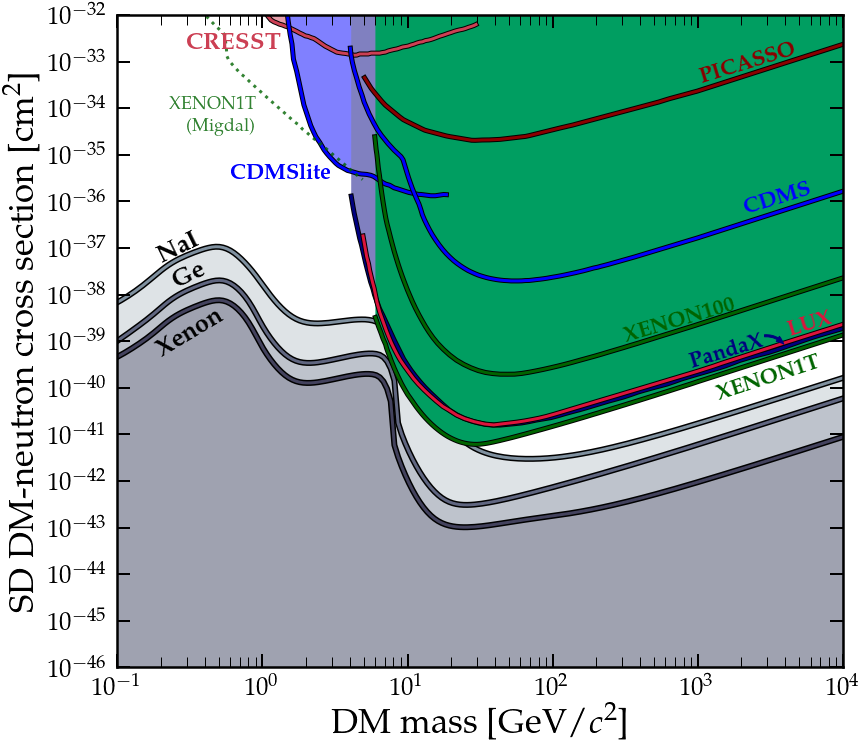

In [1]:
import sys
sys.path.append('../src')
from numpy import *
import matplotlib.pyplot as plt
from Like import *
from PlotFuncs import *
import WIMPFuncs

pek = line_background(6,'k')

fig,ax = MakeLimitPlot_SDn()

alph = 0.25
cols = cm.bone(linspace(0.3,0.7,4))
nucs = ['Xe','Ge','NaI']
zos = [0,-50,-100,-50]
C_Si = WIMPFuncs.C_SDp(Si29)/WIMPFuncs.C_SDn(Si29)
C_Ge = WIMPFuncs.C_SDp(Ge73)/WIMPFuncs.C_SDn(Ge73)
Cs = [1.0,C_Ge,1.0]
froots = ['SDn','SDp','SDn']

for nuc,zo,col,C,froot in zip(nucs,zos,cols,Cs,froots):
    data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloor'+nuc+'_detailed_'+froot+'.txt')
    m,sig,NUFLOOR,DY = Floor_2D(data)
    plt.plot(m,NUFLOOR*C,'-',color=col,lw=3,path_effects=pek,zorder=zo)
    plt.fill_between(m,NUFLOOR*C,y2=1e-99,color=col,zorder=zo,alpha=alph)

#plt.text(0.12,0.2e-35,r'{\bf Silicon}',rotation=45,color='k')
plt.text(0.23,1.5e-38,r'{\bf Ge}',rotation=25,color='k')
plt.text(0.18,5e-38,r'{\bf NaI}',rotation=26,color='k')
plt.text(0.175,5e-40,r'{\bf Xenon}',rotation=31,color='k')

MySaveFig(fig,'NuFloor_Targets_SDn')

../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


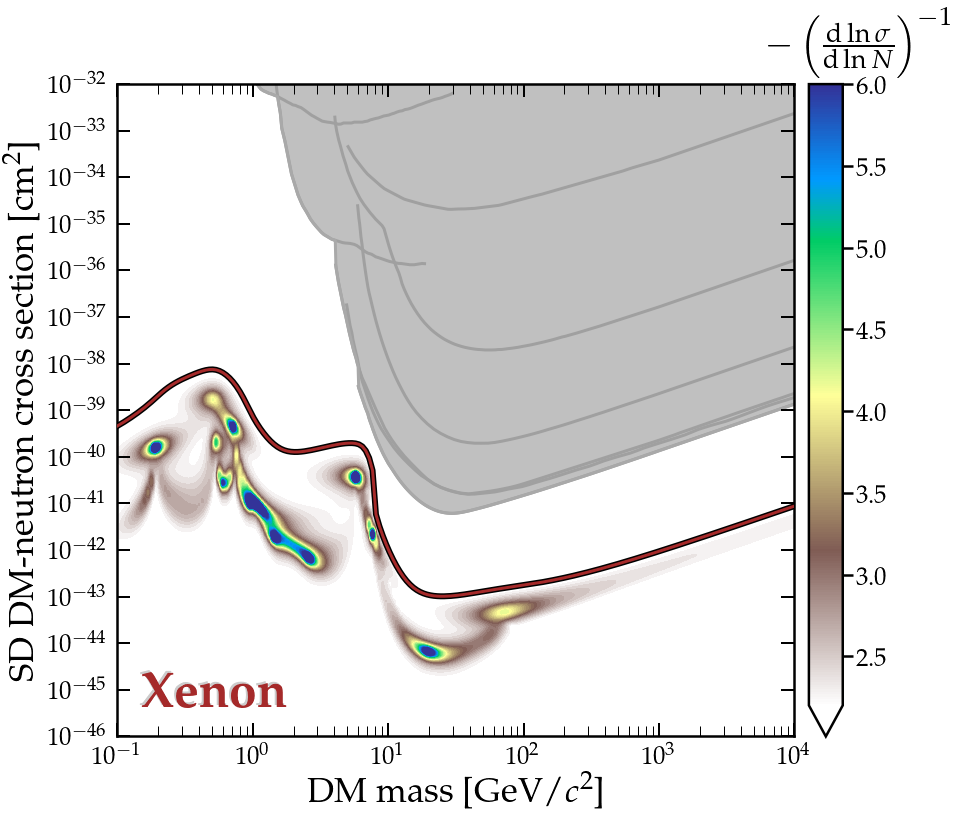

In [2]:
pek = line_background(6,'k')
cmap = cm.terrain_r

fig,ax = MakeLimitPlot_SDn(Collected=True,alph=1,edgecolor=col_alpha('gray',0.75),facecolor=col_alpha('gray',0.5))

data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SDn.txt')
m,sig,NUFLOOR,DY = Floor_2D(data,filt=True,filt_width=2,Ex_crit=1e10)
cnt = plt.contourf(m,sig,DY,levels=linspace(2,15,100),vmax=8,vmin=2.2,cmap=cmap)
for c in cnt.collections:
    c.set_edgecolor("face")
plt.plot(m,NUFLOOR,'-',color='brown',lw=3,path_effects=pek,zorder=100)

im = plt.pcolormesh(-m,sig,DY,vmax=6,vmin=2.2,cmap=cmap,rasterized=True)
cbar(im,extend='min')
plt.gcf().text(0.82,0.9,r'$-\left(\frac{{\rm d}\ln\sigma}{{\rm d}\ln N}\right)^{-1}$',fontsize=35)

plt.gcf().text(0.15*(1-0.01),0.16*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.15,0.16,r'{\bf Xenon}',color='brown',fontsize=50)

MySaveFig(fig,'NuFloorDetailed_Xe_SDn')

../src/Like.py:33: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:58: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


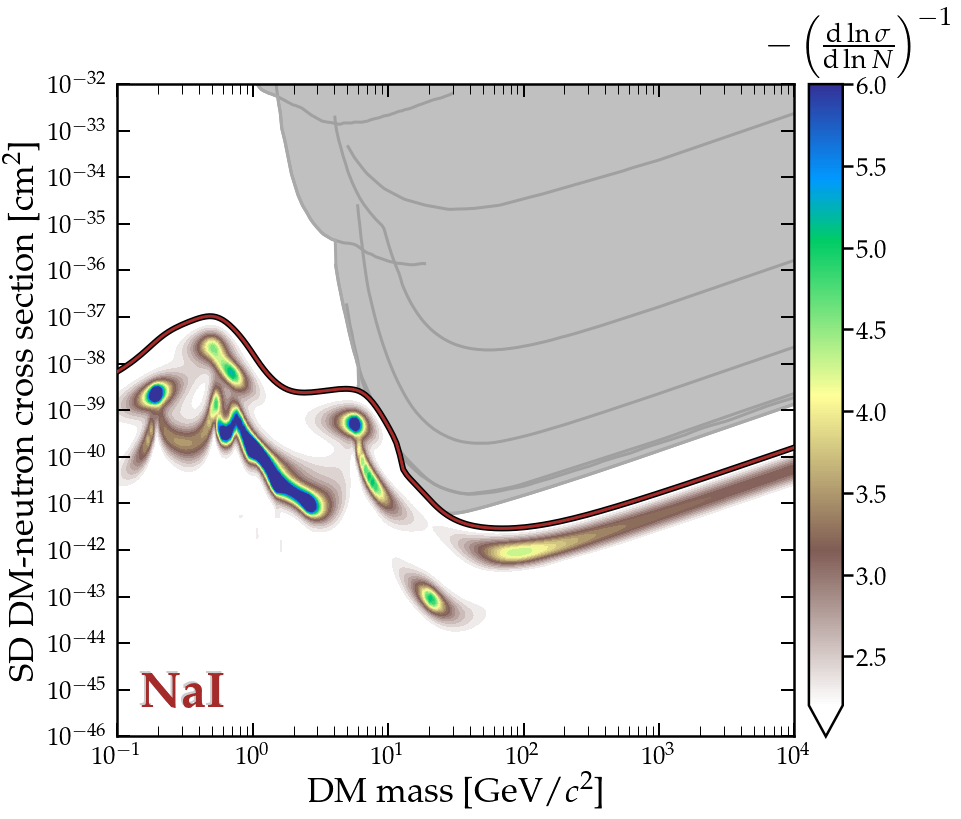

In [3]:
fig,ax = MakeLimitPlot_SDn(Collected=True,alph=1,edgecolor=col_alpha('gray',0.75),facecolor=col_alpha('gray',0.5))

data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorNaI_detailed_SDn.txt')
m,sig,NUFLOOR,DY = Floor_2D(data,filt=True,filt_width=2,Ex_crit=1e11)
cnt = plt.contourf(m,sig,DY,levels=linspace(2,15,100),vmax=6,vmin=2.2,cmap=cmap)
for c in cnt.collections:
    c.set_edgecolor("face")
plt.plot(m,NUFLOOR,'-',color='brown',lw=3,path_effects=pek,zorder=100)

im = plt.pcolormesh(-m,sig,DY,vmax=6,vmin=2.2,cmap=cmap,rasterized=True)
cbar(im,extend='min')
plt.gcf().text(0.82,0.9,r'$-\left(\frac{{\rm d}\ln\sigma}{{\rm d}\ln N}\right)^{-1}$',fontsize=35)

plt.gcf().text(0.15*(1-0.01),0.16*(1+0.01),r'{\bf NaI}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.15,0.16,r'{\bf NaI}',color='brown',fontsize=50)

MySaveFig(fig,'NuFloorDetailed_NaI_SDn')

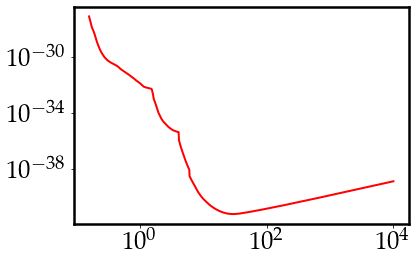

In [4]:
dat1 = loadtxt("../data/WIMPLimits/SDn/XENON1T.txt")
dat2 = loadtxt("../data/WIMPLimits/SDn/PandaX.txt")
dat3 = loadtxt("../data/WIMPLimits/SDn/CDMSlite.txt")
dat4 = loadtxt("../data/WIMPLimits/SDn/CRESST.txt")

dats = [dat1,dat2,dat3,dat4]

mmin = amin(dat4[:,0])
mmax = 1e4
mvals = logspace(log10(mmin),log10(mmax),1000)

sig = zeros(shape=1000)
for dat in dats:
    sig1 = 10**interp(log10(mvals),log10(dat[:,0]),log10(dat[:,1]))
    sig1[mvals<amin(dat[:,0])] = inf
    sig1[mvals>amax(dat[:,0])] = inf
    sig = column_stack((sig,sig1))
sig = sig[:,1:]

sig = amin(sig,1)

plt.loglog(mvals,sig,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('../data/WIMPLimits/SDn/AllLimits-2021.txt',column_stack((mvals,sig)))
